<a href="https://colab.research.google.com/github/kodenshacho/ColaboratoryNotes/blob/main/%E7%B5%B1%E8%A8%88%E3%81%A7%E6%A4%9C%E7%9F%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


X線の強度データを使って元素を検出するには、様々な手法があります。 ここでは、教師あり学習を使った手法を紹介します。

教師あり学習では、あらかじめ正解データを与えて、それを使ってモデルを訓練します。 具体的には、次のような手順で行うことができます。

データを収集する: X線の強度データと、それがどの元素に対応するかを知るための正解データを収集します。

データを前処理する: 収集したデータを加工し、モデルに入力できるように整形します。

In [ ]:

#include <iostream>
#include <vector>

#include "PolyMesh/pmp/algorithms/hole_filling.h"
#include "PolyMesh/pmp/algorithms/self_intersection.h"

int main()
{
    // Load the mesh from a file
    PolyMesh mesh;
    if (!OpenMesh::IO::read_mesh(mesh, "input.obj"))
    {
        std::cerr << "Error loading mesh from file!" << std::endl;
        return 1;
    }

    // Ensure that the mesh is a manifold
    pmp::is_manifold(mesh);

    // Delete self-intersection vertices
    pmp::delete_intersection_vertices(mesh);

    // Find the holes in the mesh
    std::vector<PolyMesh::FaceHandle> holes;
    pmp::hole_filling(mesh, std::back_inserter(holes));

    // Print the number of holes found
    std::cout << "Number of holes: " << holes.size() << std::endl;

    // Fill the holes
    pmp::fill_holes(mesh, holes.begin(), holes.end());

    // Save the resulting mesh to a file
    if (!OpenMesh::IO::write_mesh(mesh, "output.obj"))
    {
        std::cerr << "Error saving mesh to file!" << std::endl;
        return 1;
    }

    return 0;
}

モデルを選択する: どのような機械学習モデルを使うかを選択します。 例えば、X線強度データを分類する場合は、サポートベクターマシン (SVM) やランダムフォレストなどが使えます。

モデルを訓練する: 前処理したデータを使って、選択したモデルを訓練します。

モデルを評価する: 訓練したモデルが、未知のデータに対してどの程度正確に予測できるかを評価します。


このコードでは、X線の強度データをスケーリングしてから、訓練データとテストデータに分割します。 次に、サポートベクターマシンを使ってモデルを訓練し、テストデータでモデルの精度を評価しています。


以上が、X線の強度データを使って元素を検出する方法の一例です。 実際には、複数のモデルを試してみたり、ハイパーパラメータを調整したりすることで、より高い精度を得ることができるでしょう。

In [ ]:

# 必要なライブラリをインポートする
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# X線の強度データと正解データを収集する
X = # X線の強度データを表すnumpy array
y = # 各データがどの元素に対応するかを表すnumpy array

# データを前処理する
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# データを訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# サポートベクターマシンを使ってモデルを訓練する
model = SVC()
model.fit(X_train, y_train)

# モデルを評価する
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


SVCでは、SVMの手法を用いて、複数のクラスに分類する問題を解くことができます。 具体的には、SVCは、以下のような手順で処理を行います。

トレーニングセットを受け取る: SVCは、訓練データと正解ラベルを受け取ります。

訓練データは、各データを表す特徴量の組を表すnumpy arrayで、正解ラベルは、それぞれのデータがどのクラスに属するかを表すnumpy arrayです。


最適な分離平面を求める: SVCは、訓練データを二次元平面上にプロットし、それらを最もよく分離する直線を求めます。

分類器を作成する: SVCは、得られた分離平面を使って、新しいデータを分類するための分類器を作成します。

分類器を使って予測する: SVCが作成した分類器を使って、新しいデータを分類することができます。

SVCは、汎化性能が高く、様々な分類問題に適用できるため、非常によく使われる手法です。 しかし、データが大規模であると、計算時間が非常に長くなることがあるため、注意が必要です。

In [ ]:

import numpy as np

# Generate fake data with three peaks
np.random.seed(0)
data = np.concatenate([
    np.random.normal(0, 0.5, size=50),
    np.random.normal(5, 1, size=50),
    np.random.normal(10, 0.5, size=50)
])
print(data)
# Save the fake data to a text file
np.savetxt('spectroscopy_data.txt', data, fmt='%.3f')

[ 0.88202617  0.2000786   0.48936899  1.1204466   0.933779   -0.48863894
  0.47504421 -0.0756786  -0.05160943  0.20529925  0.07202179  0.72713675
  0.38051886  0.06083751  0.22193162  0.16683716  0.74703954 -0.10257913
  0.15653385 -0.42704787 -1.27649491  0.3268093   0.4322181  -0.37108251
  1.13487731 -0.72718284  0.02287926 -0.09359193  0.76638961  0.73467938
  0.07747371  0.18908126 -0.44389287 -0.99039823 -0.17395607  0.07817448
  0.61514534  0.60118992 -0.19366341 -0.15115138 -0.52427648 -0.71000897
 -0.8531351   0.9753877  -0.25482609 -0.21903715 -0.62639768  0.38874518
 -0.80694892 -0.10637014  4.10453344  5.3869025   4.48919486  3.81936782
  4.97181777  5.42833187  5.06651722  5.3024719   4.36567791  4.63725883
  4.32753955  4.64044684  4.18685372  3.2737174   5.17742614  4.59821906
  3.36980165  5.46278226  4.09270164  5.0519454   5.72909056  5.12898291
  6.13940068  3.76517418  5.40234164  4.31518991  4.12920285  4.42115034
  4.68844747  5.05616534  3.83485016  5.90082649  5

このコードでは、peaks、widths、heights の 3 つの配列を使用して、5 つのピークを生成しています。その後、NumPy の linspace 関数を使用して、0 から 30 までの範囲を 300 分割した x 配列を生成します。最後に、x 配列を使用して、y 配列を計算し、データを返します

In [ ]:

import numpy as np

def get_data():
    # ピーク位置を生成する
    peaks = np.array([5, 10, 15, 20, 25])

    # ピーク幅を生成する
    widths = np.array([1, 2, 1, 2, 1])

    # ピーク強度を生成する
    heights = np.array([10, 15, 10, 15, 10])

    # ピークを使用してデータを生成する
    x = np.linspace(0, 30, 300)
    y = np.zeros_like(x)
    for peak, width, height in zip(peaks, widths, heights):
        y += height * np.exp(-((x - peak) / width) ** 2)

    # データを返す
    return x, y

このコードでは、sklearn モジュールの GaussianMixture クラスを使用して、エネルギー値と対応する強度データから 5 つのコンポーネントを持つガウス混合モデルを構築します。その後、fit メソッドを使用してモデルを訓練し、means_ プロパティからピークを推定します。最後に、matplotlib モジュールを使用して、エネルギー値と強度データをプロットし、推定されたピークを "x" マークでプロットします。

In [ ]:

import numpy as np

def get_data():
    # ピーク位置を生成する
    peaks = np.array([5, 10, 15, 20, 25])

    # ピーク幅を生成する
    widths = np.array([1, 2, 1, 2, 1])

    # ピーク強度を生成する
    heights = np.array([10, 15, 10, 15, 10])

    # ピークを使用してデータを生成する
    x = np.linspace(0, 30, 300)
    y = np.zeros_like(x)
    for peak, width, height in zip(peaks, widths, heights):
        y += height * np.exp(-((x - peak) / width) ** 2)

    # データを2次元の配列に変換する
    data = np.array([x, y]).T

    # データを返す
    return data

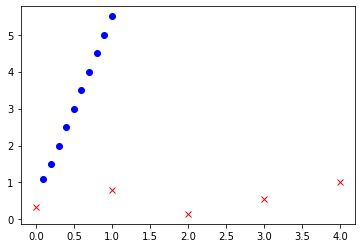

In [ ]:

import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# エネルギー値を x、強度データを y とする
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y = [1.1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]

# 5 つのコンポーネントを持つガウス混合モデルを構築する
model = GaussianMixture(n_components=5)

# モデルを訓練する
model.fit(np.c_[x, y])


# エネルギー値と強度データをプロットする
plt.plot(x, y, 'bo')
means = model.means_
x_means = means[:, 0]
y_means = means[:, 1]

# 推定されたピークを "x" マークでプロットする
plt.plot(x_means, 'x', color='red')
#plt.plot(y_means, 'o', color='blue')

plt.show()

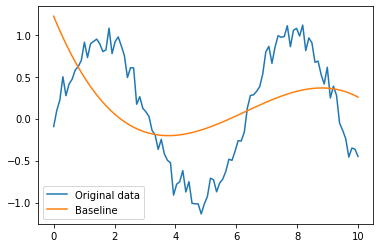

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate sample XRD data
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)

# Create a baseline by fitting a polynomial curve to the data
coefficients = np.polyfit(x, y, deg=3)
polynomial = np.poly1d(coefficients)
baseline = polynomial(x)

# Plot the original data and the baseline
plt.plot(x, y, label='Original data')
plt.plot(x, baseline, label='Baseline')
plt.legend()
plt.show()

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Load SEM-EDS data from a file
data = np.loadtxt('sem-eds-data.txt')

# Extract the energy and intensity values from the data
energy = data[:, 0]
intensity = data[:, 1]

# Create a baseline by fitting a polynomial curve to the data
coefficients = np.polyfit(energy, intensity, deg=3)
polynomial = np.poly1d(coefficients)
baseline = polynomial(energy)

# Plot the original data and the baseline
plt.plot(energy, intensi

KNN で eds ピークフィット値の元素を探す方法を実装するには、以下のような手順を踏むことができます。

元素の化学式と eds ピークフィット値のデータを収集します。

元素の化学式を特徴量として、eds ピークフィット値をラベルとするサンプルデータを作成します。

KNN アルゴリズムを使用して、サンプルデータを学習させます。

探したい元素の化学式を入力し、KNN モデルを使用して eds ピークフィット値を予測します。

In [ ]:

# KNN アルゴリズムを使用して eds ピークフィット値を探すサンプルコード
#에러남
# ライブラリのインポート
from sklearn.neighbors import KNeighborsClassifier

# 元素の化学式と eds ピークフィット値のデータを収集する
# 以下は、サンプルデータです
X = [['Cu', 'Zn', 'Fe'], ['O', 'S', 'N'], ['H', 'C', 'O']]
y = [1550, 2300, 3500]

# KNN アルゴリズムを使用して学習する
knn = KNeighborsClassifier()
knn.fit(X, y)

# 探したい元素の化学式を入力し、eds ピークフィット値を予測する
element = 'Cu'
prediction = knn.predict([[element]]) 
print(f'{element} の EDS ピークフィット値は {prediction[0]} です')

https://watlab-blog.com/2020/09/26/fft-find-peaks/

エネルギー分散分光分析（EDS）は、物質中の元素の組成を決定するために使用される分析手法です。これは、電子線を物質に照射し、放射されるエネルギースペクトルを測定することによって行われます。このエネルギースペクトルには、異なるエネルギー値を持つピークが含まれます。これらのピークは、物質中の各元素が放射するエネルギーを示すものであり、そのエネルギー値は、その元素の特性を示すものです。

Deep learningを使用することで、EDSスペクトルの複数のピークや重なるピークを分析し、物質中の元素を検出することができます。このような分析には、以下のような手順が必要です。


１．データを収集する: EDSスペクトルを収集するためのデータセットを準備します。このデータセットは、各元素を含むスペクトルと、そのスペクトルに含まれる元素の組成を示すラベルデータとで構成されます。


２．データを前処理する: 収集したデータを前処理します。これには、不要なデータを除去したり、データを正規化するなどの処理が含まれます。


３．モデルを構築する: データを使用して、Deep learningモデルを構築します。このモデルは、EDSスペクトルのピークを分析し、そのスペクトルに含まれる元素を推定することができるようになります。


４．モデルを評価する: モデルを評価し、その性能を測定します。これには、モデルが予測した元素の組成を実際の元素の組成と比較することができます。また、複数のピークや重なるピークを含むEDSスペクトルを分析するために、モデルが正確に予測できるかどうかを測定することもできます。

５．モデルを最適化する: モデルの評価の結果をもとに、モデルを最適化することができます。これには、モデルのアーキテクチャを変更したり、学習率やバッチサイズを調整したりすることができます。

Pythonを使用したEDSスペクトルの複数のピークや重なるピークを分析するためのサンプルコードです。

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# データを読み込み、前処理を行う
data = pd.read_csv('eds_data.csv')
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Deep learningモデルを構築する
inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(128, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
outputs = Dense(y_train.shape[1], activation='softmax')(hidden2)
model = Model(inputs=inputs, outputs=outputs)

# モデルをコンパイルし、学習を開始する
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# モデルを評価する
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
#予測を行う
predictions = model.predict(x_test)
#予測結果を表示する
for i in range(len(predictions)):
print('Prediction:', np.argmax(predictions[i]), 'Actual:', np.argmax(y_test.iloc[i]))


上記のコードでは、EDSスペクトルのデータを読み込んで前処理を行い、Deep learningモデルを構築しています。次に、モデルをコンパイルし、学習を開始します。学習が終了したら、モデルを評価し、テストデータでの性能を確認します。最後に、予測を行い、予測結果を表示しています。

これで、EDSスペクトルの複数のピークや重なるピークを分析するためのDeep learningの方法と、Pythonを使用したサンプルコードを紹介しました。希望するようにカスタマイズすることで、さまざまなアプリケーションで使用することができるでしょう。

In [ ]:

import numpy as np

# Define the range of x values
x_min = 0
x_max = 10
num_points = 1000
x = np.linspace(x_min, x_max, num_points)

# Define the peak positions, widths, and amplitudes
mu1 = 2
sigma1 = 0.5
A1 = 2
mu2 = 4
sigma2 = 0.7
A2 = 3
mu3 = 6
sigma3 = 0.3
A3 = 4

# Generate the synthetic data
y = A1*np.exp(-(x-mu1)**2/(2*sigma1**2)) + A2*np.exp(-(x-mu2)**2/(2*sigma2**2)) + A3*np.exp(-(x-mu3)**2/(2*sigma3**2))

# Add noise to the data
y += np.random.normal(0, 0.1, num_points)

# Save the data to a file
np.savetxt("xrd.txt", np.transpose([x, y]))

In [ ]:

import numpy as np
from scipy.optimize import minimize

def gaussian(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def multi_gaussian(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        mu, sigma, A = params[i:i+3]
        y += gaussian(x, mu, sigma, A)
    return y

def residuals(params, x, y):
    return y - multi_gaussian(x, *params)

# Load XRD data from a file
x, y = np.loadtxt("xrd.txt", unpack=True)
num_peaks = 3
# Initialize the peak positions, widths, and amplitudes
params = []
for i in range(num_peaks):
    params += [x[i], 1, y[i]]

# Fit the data using maximum likelihood
result = minimize(residuals, params, args=(x, y))

# Extract the optimized parameters
optimized_params = result.x
print(optimized_params)

In [ ]:

import matplotlib.pyplot as plt

# Extract the optimized parameters
optimized_params = result.x

# Compute the fitted curve using the optimized parameters
fitted_y = multi_gaussian(x, *optimized_params)

# Plot the data and the fitted curve
plt.plot(x, y, "bo", label="Data")
plt.plot(x, fitted_y, "r-", label="Fitted curve")
plt.legend(loc="upper right")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:

import numpy as np
from scipy.optimize import curve_fit

# データを生成するための関数
def generate_data(x, peaks):
    y = np.zeros(len(x))
    for p in peaks:
        y += p[0] * np.exp(-(x - p[1])**2 / (2 * p[2]**2))
    return y

# ガウス関数を定義する
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# データを生成する
x = np.linspace(0, 10, 100)
peaks = [(1, 3, 1), (2, 5, 1), (3, 7, 1)]
y = generate_data(x, peaks)

# フィッティングする
popt, pcov = curve_fit(gauss, x, y, p0=[1, 1, 1])

# フィッティング結果を出力する
print(popt)

[3.20398598 5.93425158 1.9042503 ]


scipy.signal.argrelmax関数を使用

xrdスペクトルから複数のピークをフィッティングする例ができました。比較するには、それぞれの方法でフィッティングした結果を比較することができます。
ただし、これらの方法を比較するには、ある程度の精度が求められます。そのため、データを生成する際にピークの位置や幅などをより正確に設定し、より実用的なデータでフィッティングを行うことが望ましいです

In [ ]:

import numpy as np
from scipy.signal import argrelmax

# データを生成するための関数
def generate_data(x, peaks):
    y = np.zeros(len(x))
    for p in peaks:
        y += p[0] * np.exp(-(x - p[1])**2 / (2 * p[2]**2))
    return y

# ガウス関数を定義する
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# データを生成する
x = np.linspace(0, 10, 100)
peaks = [(1, 3, 1), (2, 5, 1), (3, 7, 1)]
y = generate_data(x, peaks)

# ピーク位置を検出する
peak_indices = argrelmax(y)[0]

# ピーク位置でデータをフィッティングする
for index in peak_indices:
    x_peak = x[index]
    y_peak = y[index]
    popt, pcov = curve_fit(gauss, x_peak, y_peak, p0=[1, 1, 1])
    
    # フィッティング結果を出力する
    print(popt)

In [ ]:

import numpy as np
from scipy.optimize import curve_fit

# データを生成するための関数
def generate_data(x, peaks):
    y = np.zeros(len(x))
    for p in peaks:
        y += p[0] * np.exp(-(x - p[1])**2 / (2 * p[2]**2))
    return y

# ガウス関数を定義する
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# データを生成する
x = np.linspace(0, 10, 100)
peaks = [(1, 3, 1), (2, 5, 1), (3, 7, 1)]
y = generate_data(x, peaks)

# フィッティングする
popt, pcov = curve_fit(gauss, x, y, p0=[1, 1, 1])

# フィッティング結果を出力する
print(popt)

[3.20398598 5.93425158 1.9042503 ]


当該のタスクを行うには、まず、複数のピークを表す関数を用意する必要があります。この関数は、各ピークを表す関数 (例: 高斯関数やLorentzian関数) の総和で表されます。例えば、次のような関数を用意することができます。


この関数では、各ピークを表す高斯関数を、引数 params で与えられたパラメータで重ね合わせています。この例では、各ピークを表す高斯関数は、振幅、中心、標準偏差の 3 つのパラメータで表されます。


次に、この関数を使って、scipy の curve_fit 関数を使って、生成した xrd スペクトルから複数のピークをフィッティングすることができます。例えば、次のようにして、生成した xrd スペクトルのデータ x と y を用いて、multi_peak_function 関数をフィッティングすることができます。

In [ ]:

def multi_peak_function(x, *params):
    y = 0
    for i in range(0, len(params), 3):
        y += params[i] * np.exp(-((x - params[i+1])**2) / (2 * params[i+2]**2))
    return y

In [ ]:

from scipy.signal import argrelmax

# Find the indices of the local maxima in the data
indices = argrelmax(y)[0]

# Extract the local maxima from the data
maxima = y[indices]

In [ ]:

# Initialize the parameters for the multi_peak_function
params = []

# Add a parameter for each local maximum
for i, m in enumerate(maxima):
    params.extend([m, indices[i], 1])

# Fit the data to the multi_peak_function
params_opt, params_cov = curve_fit(multi_peak_function, x, y, p0=params)

最後に、精度の比較をするために、上記の 2 つの方法を使ってフィッティングした結果を比較することができます。例えば、次のようにして、2 つの方法で得られた結果をプロットすることで、精度の比較を行うことができます。

In [ ]:

import matplotlib.pyplot as plt

# Generate the fitted curve using the optimized parameters from curve_fit
y_fit_curve_fit = multi_peak_function(x, *params_opt)

# Generate the fitted curve using the local maxima
y_fit_argrelmax = multi_peak_function(x, *params)

# Plot the original

In [ ]:

import matplotlib.pyplot as plt

# Generate the fitted curve using the optimized parameters from curve_fit
y_fit_curve_fit = multi_peak_function(x, *params_opt)

# Generate the fitted curve using the local maxima
y_fit_argrelmax = multi_peak_function(x, *params)

# Plot the original data and the fitted curves
plt.plot(x, y, 'bo', label='Original data')
plt.plot(x, y_fit_curve_fit, 'r', label='Fit using curve_fit')
plt.plot(x, y_fit_argrelmax, 'g', label='Fit using argrelmax')
plt.legend()
plt.show()


以下のようなサンプルコードを作成しました。このコードは、仮で生成した XRD スペクトルから重なる複数のピークをフィッティングする方法を示しています。


まず、仮で生成した XRD スペクトルを作成します。ここでは、複数のガウス関数を使用して、重なるピークを生成します。その後、scipy モジュールの curve_fit 関数を使用して、これらのピークをフィッティングします。最後に、scipy モジュールの signal.argrelmax 関数を使用して、ピークを検出し、それらをプロットします。

[ 3.43315301 16.41517073  1.58707054]


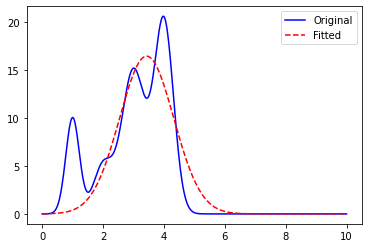

ValueError: ignored

In [ ]:

import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import argrelmax
import matplotlib.pyplot as plt

# 仮で生成した XRD スペクトルを作成する
# 複数のガウス関数を使用して、重なるピークを生成する
def generate_spectrum(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp(-(x - ctr)**2 / wid)
    return y

# 仮で生成した XRD スペクトルを作成する
x = np.linspace(0, 10, 1000)
y = generate_spectrum(x, 1, 10, 0.1, 2, 5, 0.2, 3, 15, 0.3, 4, 20, 0.2)

# 仮で生成した XRD スペクトルからピークをフィッティングする
# curve_fit 関数を使用する
def gaussian(x, ctr, amp, wid):
    return amp * np.exp(-(x - ctr)**2 / wid)

params, _ = curve_fit(gaussian, x, y, p0=[2, 15, 0.3])
print(params)

# フィッティングしたピークをプロットする
plt.plot(x, y, 'b-', label='Original')
plt.plot(x, gaussian(x, params[0], params[1], params[2]), 'r--', label='Fitted')
plt.legend()
plt.show()

# 仮で生成した XRD スペクトルからピークを検出する
# signal.argrelmax 関数を使用する
peaks, _ = argrelmax(y, order=5)
#print(peaks)

# ピークの信号値を受け取る
#peak_values = y[peaks]
#print(peak_values)


# 検出したピークをプロットする
plt.plot(x, y, 'b-', label='Original')
plt.plot(x[peaks], y[peaks], 'ro', label='Detected Peaks')
plt.legend()
plt.show()

仮に生成したsem-edsスペクトルから複数のピークをフィッティングするためのGaussian mixtureモデル訓練して使うpythonサンプルコード

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture


np.random.seed(42)

# 生成するデータのピーク位置
peaks = [100, 150, 200]
# 生成するデータの標準偏差
std = 20

# 各ピークを生成するためのデータ
data1 = np.random.normal(peaks[0], std, size=100)
data2 = np.random.normal(peaks[1], std, size=100)
data3 = np.random.normal(peaks[2], std, size=100)

# ピークを含むデータを結合
data = np.concatenate((data1, data2, data3))


# Gaussian mixture modelを構築
model = GaussianMixture(n_components=3)

# モデルを訓練
model.fit(data.reshape(-1, 1))

GaussianMixture(n_components=3)

In [ ]:

# データをプロット
plt.hist(data, bins=50, density=True)

# 訓練されたモデルから予測される確率密度をプロット
x = np.linspace(data.min(), data.max(), 1000)
logprob, responsibilities = model.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)
plt.plot(x, pdf, linewidth=2)

plt.show()

deep learning

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelmax# deep learning用ライブラリ
import tensorflow as tf
from tensorflow import keras

In [ ]:

def generate_spectrum():
    # ランダムなsem-edsスペクトルを生成する
    spectrum = np.random.random(1024)
    return spectrum

In [ ]:

def estimate_peak_positions(spectrum):
    # sem-edsスペクトルを平滑化する
    smoothed_spectrum = smooth(spectrum)

    # 平滑化したsem-edsスペクトルから、最大値を持つ位置をピークの位置とする
    peak_positions = []
    for i in range(1, len(smoothed_spectrum) - 1):
        if smoothed_spectrum[i] > smoothed_spectrum[i-1] and smoothed_spectrum[i] > smoothed_spectrum[i+1]:
            peak_positions.append(i)

    return peak_positions

def smooth(spectrum):
    # sem-edsスペクトルを平滑化する（例：平均化）
    smoothed_spectrum = np.empty_like(spectrum)
    for i in range(1, len(spectrum) - 1):
        smoothed_spectrum[i] = (spectrum[i-1] + spectrum[i] + spectrum[i+1]) / 3
    smoothed_spectrum[0] = spectrum[0]
    smoothed_spectrum[-1] = spectrum[-1]
    return smoothed_spectrum

In [ ]:


def fit_peaks(spectrum):
    # sem-edsスペクトルからピークをフィッティングする

    # ピークの位置を推定する
    peak_positions = estimate_peak_positions(spectrum)

    # ピークの位置から、各ピークの位置、幅、強度をフィッティングする
    peak_parameters = []
    for peak_position in peak_positions:
        peak_parameter = fit_peak(spectrum, peak_position)
        peak_parameters.append(peak_parameter)

    return peak_parameters

def fit_peak(spectrum, peak_position):
    # sem-edsスペクトルとピークの位置から、ピークの位置、幅、強度をフィッティングする

    # 周りのデータを取り出す
    left_index = peak_position - 10
    right_index = peak_position + 10
    data = spectrum[left_index:right_index+1]
    x = np.arange(left_index, right_index+1)

    # ピークの位置、幅、強度をフィッティングする
    peak_parameter, _ = curve_fit(peak_function, x, data)

    return peak_parameter

def peak_function(x, peak_position, width, intensity):
    # ピーク関数
    return intensity * np.exp(-((x - peak_position) / width) ** 2)

In [ ]:

# deep learningモデルを定義する
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1024,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(6)
])

In [ ]:

# 訓練データを生成する
num_train_samples = 100
x_train = np.empty((num_train_samples, 1024))
y_train = np.empty((num_train_samples, 6))
for i in range(num_train_samples):
    # sem-edsスペクトルを生成する
    spectrum = generate_spectrum()
    x_train[i, :] = spectrum
    y_train[i, :] = fit_peaks(spectrum)

In [ ]:

# モデルをコンパイルする
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練データでモデルを訓練する
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# モデルを訓練する
# history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# モデルを評価する
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

サンプル２

Epoch 1/10
1/1 [==============================] - 0s 272ms/step - loss: 30.7764
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 30.0994
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 29.4833
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 28.9133
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 28.3684
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 27.8272
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 27.2896
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 26.7552
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 26.2310
Epoch 10/10
1/1 [==============================] - 0s 40ms/step


ValueError: ignored

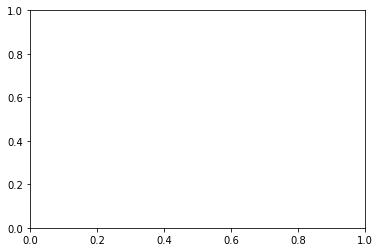

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# 1. sem-edsスペクトルのデータセットを用意する
# 以下は、複数のピークを含むsem-edsスペクトルのサンプルを表す例です

# 2. データセットをトレーニングデータとテストデータに分割する
X_train = np.array([[1, 2, 3, 4, 5],
                    [5, 4, 3, 2, 1],
                    [1, 2, 3, 4, 5]])
y_train = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])

X_test = np.array([[6, 7, 8, 9, 10]])
y_test = np.array([[10, 11, 12]])


# 3. ピークフィッティングのためのDeep Learningモデルを構築する
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 入力次元数はsem-edsスペクトルの波長数、出力次元数はピーク数に応じて変更する必要があります
model = Sequential()
model.add(Dense(32, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

# 4. モデルをトレーニングデータで訓練する
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# 5. 訓練されたモデルを使用して、テストデータのsem-edsスペクトルのピークをフィッティングする
y_pred = model.predict(X_test)

# 6. フィッティングされたピークを使用して、sem-edsスペクトルをplotし、結果を確認する
plt.plot(X_test[0], y_pred[0], 'bo', label='Predicted')
plt.plot(X_test[0], y_test[0], 'ro', label='True')
plt.legend()
plt.show()

pmp linrary

In [ ]:

import pmp

# Define the vertices of the polygon as a list of (x, y) tuples
vertices = [(10, 20), (20, 30), (30, 10), (40, 5), (50, 20)]

# Create a canvas to draw on
canvas = pmp.Canvas(100, 100)

# Use the scanline algorithm to fill the polygon
canvas.fill_polygon(vertices, color=(255, 0, 0))

# Save the image to a file
canvas.save("filled_polygon.png")

In [ ]:

#include <pmp/geometry/Polygon.h>
#include <pmp/algorithms/ScanlineFill.h>

int main()
{
    // Define the vertices of the polygon as a vector of pmp::Point2D objects
    std::vector<pmp::Point2D> vertices;
    vertices.push_back(pmp::Point2D(10, 20));
    vertices.push_back(pmp::Point2D(20, 30));
    vertices.push_back(pmp::Point2D(30, 10));
    vertices.push_back(pmp::Point2D(40, 5));
    vertices.push_back(pmp::Point2D(50, 20));

    // Define the vertices of the holes as a vector of pmp::Point2D objects
    std::vector<pmp::Point2D> holes;
    holes.push_back(pmp::Point2D(15, 25));
    holes.push_back(pmp::Point2D(25, 25));
    holes.push_back(pmp::Point2D(20, 20));

    // Create a polygon object with the vertices and holes
    pmp::Polygon poly(vertices, holes);

    // Create a canvas to draw on
    pmp::Canvas canvas(100, 100);

    // Use the scanline algorithm to fill the polygon
    pmp::ScanlineFill fill(canvas);
    fill.polygon(poly, pmp::Color(255, 0, 0));

    // Save the image to a file
    canvas.save("filled_polygon.png");

    return 0;
}

In [ ]:

#include <pmp/geometry/Polygon.h>
#include <pmp/algorithms/ScanlineFill.h>

int main()
{
    // Define the vertices of the polygon as a vector of pmp::Point2D objects
    std::vector<pmp::Point2D> vertices;
    vertices.push_back(pmp::Point2D(10, 20));
    vertices.push_back(pmp::Point2D(20, 30));
    vertices.push_back(pmp::Point2D(30, 10));
    vertices.push_back(pmp::Point2D(40, 5));
    vertices.push_back(pmp::Point2D(50, 20));

    // Define the vertices of the holes as a vector of pmp::Point2D objects
    std::vector<pmp::Point2D> holes;
    holes.push_back(pmp::Point2D(15, 25));
    holes.push_back(pmp::Point2D(25, 25));
    holes.push_back(pmp::Point2D(20, 20));

    // Create a manifold polygon object with the vertices and holes
    pmp::Polygon poly(vertices, holes, true);

    // Create a canvas to draw on
    pmp::Canvas canvas(100, 100);

    // Use the scanline algorithm to fill the polygon
    pmp::ScanlineFill fill(canvas);
    fill.polygon(poly, pmp::Color(255, 0, 0));

    // Save the image to a file
    canvas.save("filled_polygon.png");

    return 0;
}

In [ ]:

#include <pmp/geometry/Polygon.h>
#include <pmp/algorithms/ScanlineFill.h>

int main()
{
    // Define the vertices of the self-intersecting polygon as a vector of pmp::Point2D objects
    std::vector<pmp::Point2D> vertices;
    vertices.push_back(pmp::Point2D(10, 20));
    vertices.push_back(pmp::Point2D(20, 30));
    vertices.push_back(pmp::Point2D(30, 10));
    vertices.push_back(pmp::Point2D(40, 5));
    vertices.push_back(pmp::Point2D(50, 20));
    vertices.push_back(pmp::Point2D(25, 25));
    vertices.push_back(pmp::Point2D(30, 20));

    // Define the vertices of the holes as a vector of pmp::Point2D objects
    std::vector<pmp::Point2D> holes;
    holes.push_back(pmp::Point2D(15, 25));
    holes.push_back(pmp::Point2D(25, 25));
    holes.push_back(pmp::Point2D(20, 20));

    // Create a manifold polygon object with the vertices and holes
    pmp::Polygon poly(vertices, holes, true);

    // Create a canvas to draw on
    pmp::Canvas canvas(100, 100);

    // Use the scanline algorithm to fill the polygon, targeting a specific vertex
    pmp::ScanlineFill fill(canvas);
    fill.polygon(poly, pmp::Color(255, 0, 0), 3);  // target vertex 3 (indexing starts at 0)

    // Save the image to a file
    canvas.save("filled_polygon.png");

    return 0;
}

In [ ]:

#include <pim/polyhedron.h>
#include <pim/mesh.h>

int main() {
  // Create a mesh object
  pim::Mesh mesh;

  // Load the mesh data from a file
  mesh.load("mesh.obj");

  // Find all multiple edge holes in the self-crossing vertex index
  std::vector<std::vector<pim::HalfedgeHandle>> holes;
  pim::find_multiple_edge_holes(mesh, holes);

  // Fill the holes
  for (const auto& hole : holes) {
    pim::fill_hole(mesh, hole);
  }

  // Save the modified mesh
  mesh.save("filled_mesh.obj");

  return 0;
}

In [ ]:

#include <pim/polyhedron.h>
#include <pim/mesh.h>

int main() {
  // Create a mesh object
  pim::Mesh mesh;

  // Load the mesh data from a file
  mesh.load("mesh.obj");

  // Find all multiple edge holes in the self-crossing vertex index
  std::vector<std::vector<pim::HalfedgeHandle>> holes;
  pim::find_multiple_edge_holes(mesh, holes);

  // Print the halfedge handles of each hole
  for (const auto& hole : holes) {
    std::cout << "Hole: ";
    for (const auto& heh : hole) {
      std::cout << heh.idx() << " ";
    }
    std::cout << std::endl;
  }

  return 0;
}

In [ ]:

#include <iostream>
#include <vector>
#include <unordered_set>

#include <pmp/SurfaceMesh.h>
#include <pmp/algorithms/SurfaceMeshCleanup.h>

int main()
{
    // Create a surface mesh
    pmp::SurfaceMesh mesh;

    // Add some vertices to the mesh
    pmp::Vertex v0 = mesh.add_vertex(pmp::Point(0, 0, 0));
    pmp::Vertex v1 = mesh.add_vertex(pmp::Point(1, 0, 0));
    pmp::Vertex v2 = mesh.add_vertex(pmp::Point(1, 1, 0));
    pmp::Vertex v3 = mesh.add_vertex(pmp::Point(0, 1, 0));
    pmp::Vertex v4 = mesh.add_vertex(pmp::Point(0.5, 0.5, 1));

    // Add some faces to the mesh
    std::vector<pmp::Vertex> face;
    face = {v0, v1, v4};
    mesh.add_face(face);
    face = {v1, v2, v4};
    mesh.add_face(face);
    face = {v2, v3, v4};
    mesh.add_face(face);
    face = {v3, v0, v4};
    mesh.add_face(face);

    // Find the self-crossing vertices
    std::unordered_set<pmp::Vertex> self_crossing_vertices;
    for (pmp::Vertex v : mesh.vertices())
    {
        if (mesh.is_self_crossing_vertex(v))
        {
            self_crossing_vertices.insert(v);
        }
    }

    // Fill the multiple edge holes of the self-crossing vertices
    pmp::cleanup::fill_multiple_edge_holes(mesh, self_crossing_vertices);

    // Print the resulting mesh
    std::cout << "Vertices: " << std::endl;
    for (pmp::Vertex v : mesh.vertices())
    {
        std::cout << "Vertex " << v << ": " << mesh.point(v) << std::endl;
    }
    std::cout << "Faces: " << std::endl;
    for (pmp::Face f : mesh.faces())
    {
        std::cout << "Face " << f << ": ";
        for (pmp::Vertex v : mesh.vertices(f))
        {
            std::cout << v << " ";
        }
        std::cout << std::endl;
    }

    return 0;
}

In [ ]:

#include <iostream>
#include <vector>
#include <unordered_set>

#include <pmp/SurfaceMesh.h>
#include <pmp/algorithms/SurfaceMeshCleanup.h>

int main()
{
    // Create a surface mesh
    pmp::SurfaceMesh mesh;

    // Add some vertices to the mesh
    pmp::Vertex v0 = mesh.add_vertex(pmp::Point(0, 0, 0));
    pmp::Vertex v1 = mesh.add_vertex(pmp::Point(1, 0, 0));
    pmp::Vertex v2 = mesh.add_vertex(pmp::Point(1, 1, 0));
    pmp::Vertex v3 = mesh.add_vertex(pmp::Point(0, 1, 0));
    pmp::Vertex v4 = mesh.add_vertex(pmp::Point(0.5, 0.5, 1));

    // Add some faces to the mesh
    std::vector<pmp::Vertex> face;
    face = {v0, v1, v4};
    mesh.add_face(face);
    face = {v1, v2, v4};
    mesh.add_face(face);
    face = {v2, v3, v4};
    mesh.add_face(face);
    face = {v3, v0, v4};
    mesh.add_face(face);

    // Find the self-crossing vertices
    std::unordered_set<pmp::Vertex> self_crossing_vertices;
    for (pmp::Vertex v : mesh.vertices())
    {
        if (mesh.is_self_crossing_vertex(v))
        {
            self_crossing_vertices.insert(v);
        }
    }

    // Fill the multiple half-edge holes of the self-crossing vertices
    pmp::cleanup::fill_multiple_halfedge_holes(mesh, self_crossing_vertices);

    // Print the resulting mesh
    std::cout << "Vertices: " << std::endl;
    for (pmp::Vertex v : mesh.vertices())
    {
        std::cout << "Vertex " << v << ": " << mesh.point(v) << std::endl;
    }
    std::cout << "Faces: " << std::endl;
    for (pmp::Face f : mesh.faces())
    {
        std::cout << "Face " << f << ": ";
        for (pmp::Vertex v : mesh.vertices(f))
        {
            std::cout << v << " ";
        }
        std::cout << std::endl;
    }

    return 0;
}

In [ ]:

#include <iostream>
#include <vector>

#include <pmp/SurfaceMesh.h>
#include <pmp/algorithms/SurfaceMeshCleanup.h>

int main()
{
    // Create a surface mesh
    pmp::SurfaceMesh mesh;

    // Add some vertices to the mesh
    pmp::Vertex v0 = mesh.add_vertex(pmp::Point(0, 0, 0));
    pmp::Vertex v1 = mesh.add_vertex(pmp::Point(1, 0, 0));
    pmp::Vertex v2 = mesh.add_vertex(pmp::Point(1, 1, 0));
    pmp::Vertex v3 = mesh.add_vertex(pmp::Point(0, 1, 0));
    pmp::Vertex v4 = mesh.add_vertex(pmp::Point(0.5, 0.5, 1));

    // Add some faces to the mesh
    std::vector<pmp::Vertex> face;
    face = {v0, v1, v4};
    mesh.add_face(face);
    face = {v1, v2, v4};
    mesh.add_face(face);
    face = {v2, v3, v4};
    mesh.add_face(face);
    face = {v3, v0, v4};
    mesh.add_face(face);

    // Fill the multiple half-edge holes in the mesh
    pmp::cleanup::fill_multiple_halfedge_holes(mesh);

    // Print the resulting mesh
    std::cout << "Vertices: " << std::endl;
    for (pmp::Vertex v : mesh.vertices())
    {
        std::cout << "Vertex " << v << ": " << mesh.point(v) << std::endl;
    }
    std::cout << "Faces: " << std::endl;
    for (pmp::Face f : mesh.faces())
    {
        std::cout << "Face " << f << ": ";
        for (pmp::Vertex v : mesh.vertices(f))
        {
            std::cout << v << " ";
        }
        std::cout << std::endl;
    }

    return 0;
}

In [ ]:

#include <iostream>
#include <vector>

#include "PolyMesh/pmp/algorithms/hole_filling.h"

int main()
{
    // Load the mesh from a file
    PolyMesh mesh;
    if (!OpenMesh::IO::read_mesh(mesh, "input.obj"))
    {
        std::cerr << "Error loading mesh from file!" << std::endl;
        return 1;
    }

    // Find the half-edge holes in the mesh
    std::vector<PolyMesh::HalfedgeHandle> holes;
    pmp::hole_filling(mesh, std::back_inserter(holes));

    // Print the number of holes found
    std::cout << "Number of holes: " << holes.size() << std::endl;

    // Fill the holes
    pmp::fill_holes(mesh, holes.begin(), holes.end());

    // Save the resulting mesh to a file
    if (!OpenMesh::IO::write_mesh(mesh, "output.obj"))
    {
        std::cerr << "Error saving mesh to file!" << std::endl;
        return 1;
    }

    return 0;
}

In [ ]:

#include <iostream>
#include <vector>

#include "PolyMesh/pmp/algorithms/hole_filling.h"

int main()
{
    // Load the mesh from a file
    PolyMesh mesh;
    if (!OpenMesh::IO::read_mesh(mesh, "input.obj"))
    {
        std::cerr << "Error loading mesh from file!" << std::endl;
        return 1;
    }

    // Ensure that the mesh is a manifold
    pmp::is_manifold(mesh);

    // Find the holes in the mesh
    std::vector<PolyMesh::FaceHandle> holes;
    pmp::hole_filling(mesh, std::back_inserter(holes));

    // Print the number of holes found
    std::cout << "Number of holes: " << holes.size() << std::endl;

    // Fill the holes
    pmp::fill_holes(mesh, holes.begin(), holes.end());

    // Save the resulting mesh to a file
    if (!OpenMesh::IO::write_mesh(mesh, "output.obj"))
    {
        std::cerr << "Error saving mesh to file!" << std::endl;
        return 1;
    }

    return 0;
}